# Program 4.00: Example program displaying most of the features

## Preamble

In [ ]:
using NBInclude

In [ ]:
@nbinclude("preamble/packages.ipynb");

In [ ]:
@nbinclude("preamble/model.ipynb");

In [ ]:
@nbinclude("preamble/functions.ipynb");

## Formation of the aggregate

### Initialization

In [ ]:
parameters = define_par();              # for default values. change: (...; fp=200) 

dt = 0.002;                             # stable timestep. it may work for slightly higher values too.
save_each = round(Int64, 0.25 / dt);    # save community once every save_each instances
n_cells = 300;                          # desired number of cells


In [ ]:
Random.seed!(2345)                              # plant seed for reproducibility
com = initialize_growth(parameters; dt = dt);   # initialization. dt can also be set directy

### Aggregation

In [ ]:
grow_size!(com, save_each, n_cells)     # grow for a given n_cells
# grow_time!(com,save_each,30)            # grow for a given time, (...; n_cells=500)
# stabilize!(com, save_each)              # to let the cells accomodate when fp=0
m0 = length(com);

300
true
Plot 1: timestamp 1
Plot 2: timestamp 53
Plot 3: timestamp 105
Plot 4: timestamp 158


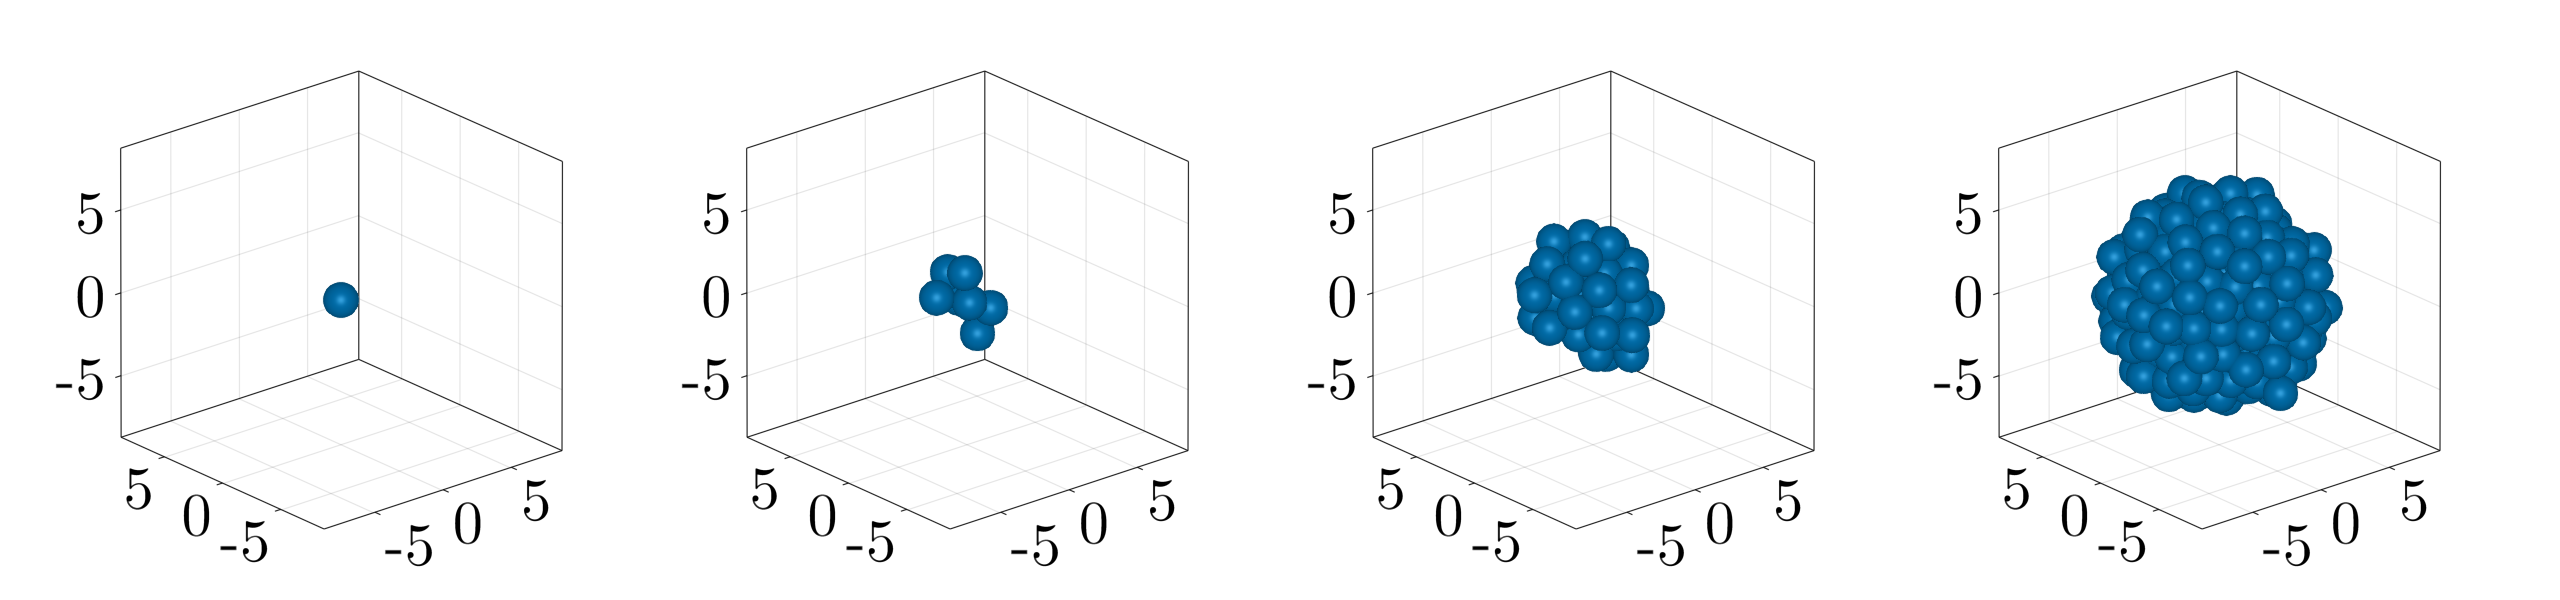

GLMakie.Screen(...)

In [8]:
println(com.N)
println(formed_correctly(com))          # no sparse cells caused by numerical errors
plot_aggregate(com, color_map, 1, m0)   # (...; size=float, showtime=false, shownumbers=true)

In [ ]:
growncom = deepcopy(com);               # backup to go back after differentiation

## Differentiation

In [ ]:
com = deepcopy(growncom)
Random.seed!(2345);

In [ ]:
initialize_diff!(com)                   # (...; g_on=false, treset=true)
m1 = length(com);

In [ ]:
differentiate!(com, save_each, 30)      # (...; prot=true, fp=200, kp_on=0.7, kp_off=0.4)
# differentiate_all!(com,save_each)     # until all cells are in state C. same options as above.
m2 = length(com);

In [ ]:
println(formed_correctly(com))

In [ ]:
evolvedcom = deepcopy(com);

## Dimensionalization

In [ ]:
com = deepcopy(evolvedcom);

In [ ]:
dimensionalize_com!(com);       # (...; *=true, all=false) for *=t,r,xyz,f,v,lambda
# nondimensionalize_com!(com, all=true)     # reverts the changes

Plot 1: timestamp 159
Plot 2: timestamp 199
Plot 3: timestamp 239
Plot 4: timestamp 279


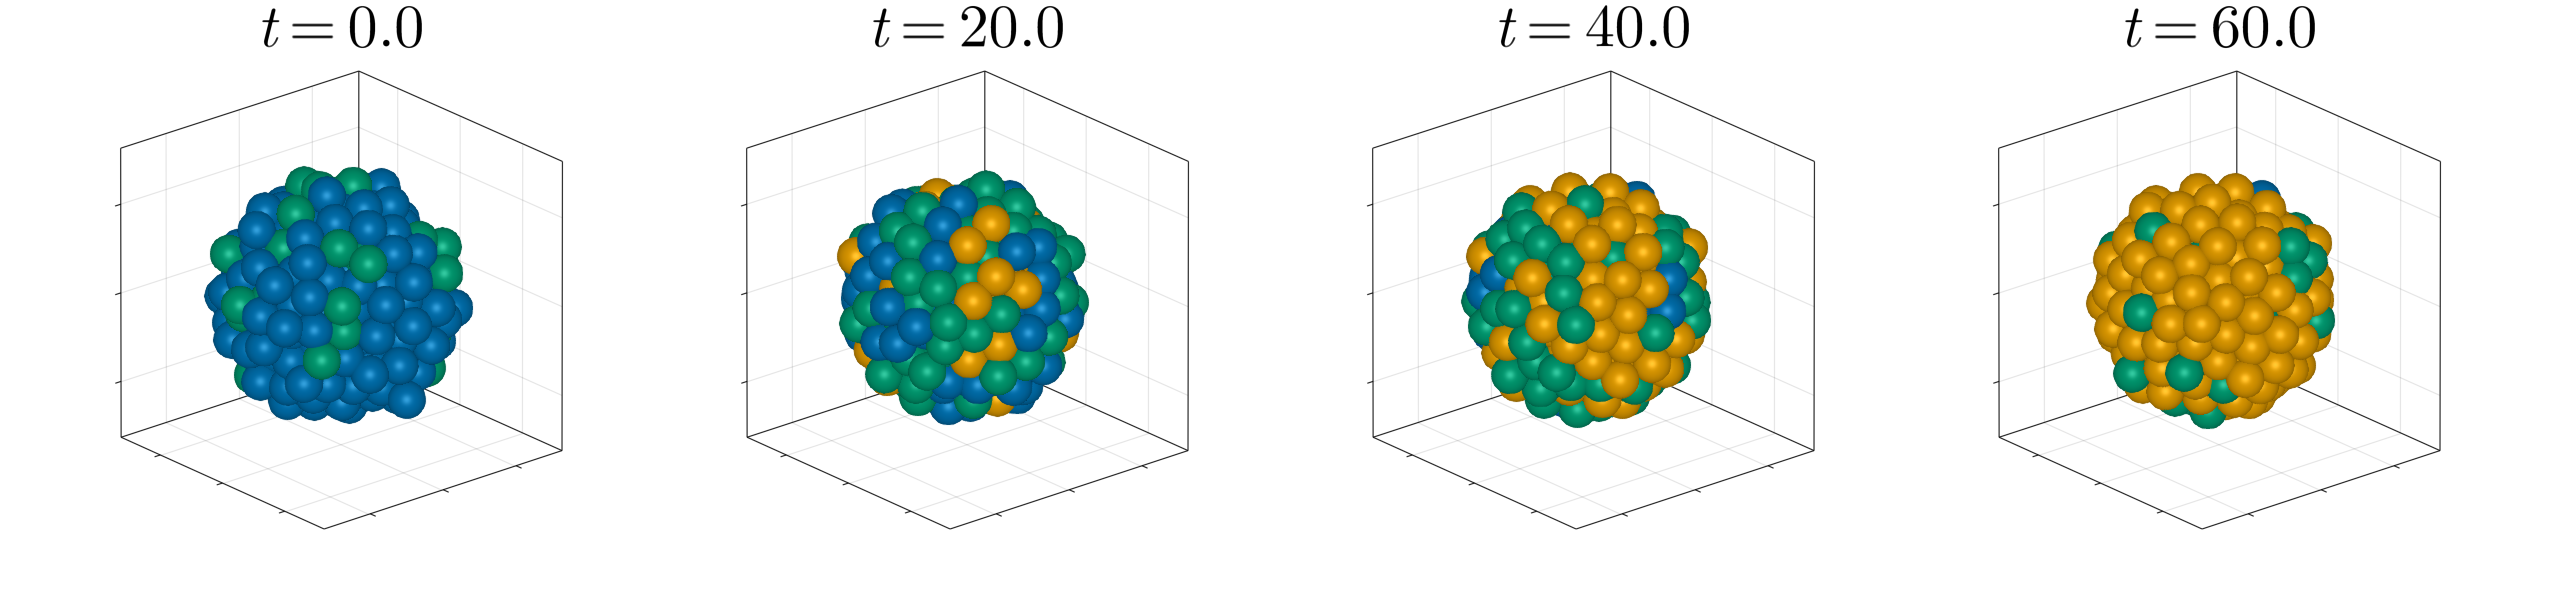

GLMakie.Screen(...)

In [17]:
plot_aggregate(com, color_map, m1, m2; showtime=true, shownumbers=false)

## Proportions

In [ ]:
props = get_props(com);      # compute proportion of each state for the saved timestamps

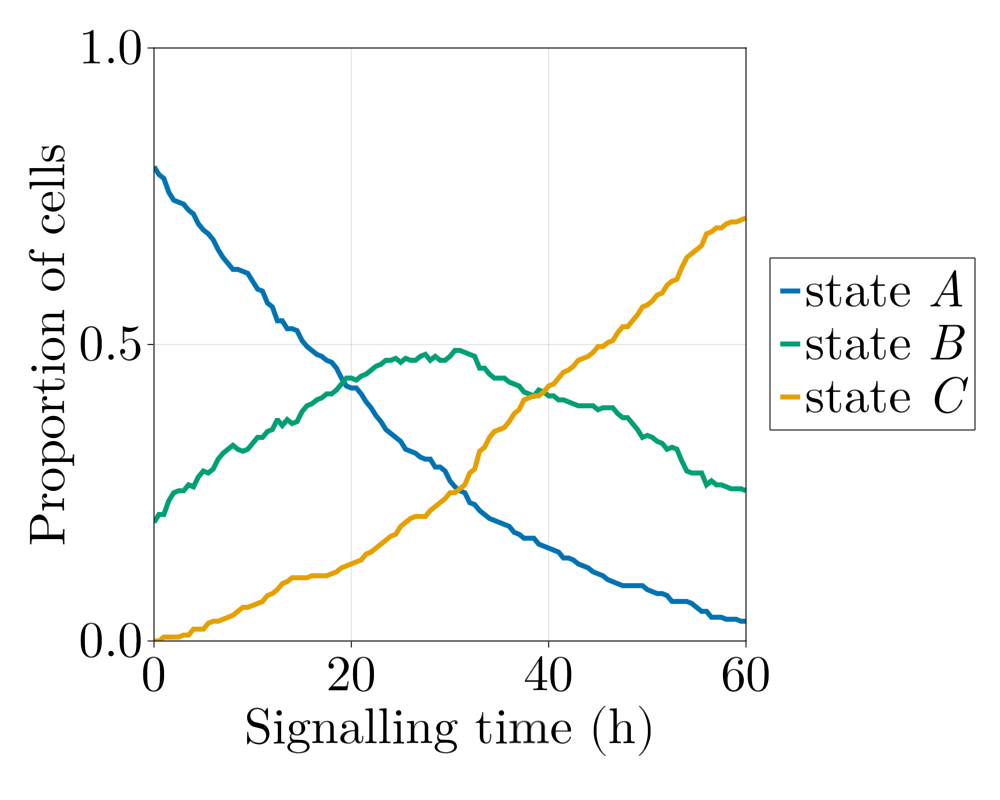

GLMakie.Screen(...)

In [20]:
plot_proportions(com, color_map, m1, m2, props)
# plot_proportions_analytical(com, color_map, m1, m2)
# plot_proportions_numerical_meanfield(com, color_map, m1, m2)
# plot_proportions_vs_analytical(com, color_map, m1, m2, props)
# plot_proportions_vs_meanfield(com, color_map, m1, m2, props)

## Movie

In [ ]:
prop = 1
n_images = round(Int, prop * (m2 - m1))
movie_frames(com, color_map, m1, m2, n_images)
moment = Dates.format(now(), "mm-dd_HHMM");

In [ ]:
run(`python3 images2gif.py $n_images $moment`)

In [ ]:
delete_movieplots();

In [ ]:
variables = Dict()
for var in [:dt, :save_each, :m1, :m2]
	variables[var] = eval(var)
end

comvalues = [:N];

In [ ]:
file = "pymovie_$moment"
print_parameters(file, com, parameters, variables, comvalues);